<a href="https://colab.research.google.com/github/arjunsai918/Intro_to_ML/blob/main/Machine_learning_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from matplotlib import markers
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/arjunsai918/Intro_to_ML/refs/heads/main/Housing.csv"
house_data = pd.read_csv(url)
display(house_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
house_data.shape

(545, 13)

In [5]:
house_data.isnull().sum()*100/house_data.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
training,testing = train_test_split(house_data, train_size = 0.8, test_size = 0.2, random_state = 100)

Gradient Descent function and Loss Function

In [7]:
def preprocess(data,variables):
  house_data_new = data[variables].replace({'yes':1,'no':0})
  x = house_data_new.iloc[:,1:]
  m = x.shape[0]
  y = np.array(house_data_new.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))

  return x,y

In [8]:
def gradient_descent(X_training, X_testing, Y_training, Y_testing, initial_theta,learning_rate, num_iterations):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(num_iterations):
        predictions_training = X_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = (X_training.T.dot(error_training) / m_training)
        theta -= learning_rate * gradient
        training_loss = np.sum(error_training**2) / (2 * m_training)
        training_losses.append(training_loss)
        predictions_testing = X_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = np.sum(error_testing**2) / (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses[:i+1], testing_losses[:i+1]

In [16]:
variables=[ 'price','area', 'bedrooms','bathrooms','stories','parking' ]
X_training1a,Y_training1a = preprocess(training,variables)
X_testing1a,Y_testing1a = preprocess(testing,variables)


In [17]:
theta = np.zeros(6).reshape(6,1)
num_iterations1 = 9000
learning_rate1= 0.00000001
theta1a_1,loss_train1a_1,loss_test1a_1 = gradient_descent(X_training1a,X_testing1a,Y_training1a,Y_testing1a, theta, learning_rate1,num_iterations1)
print(theta1a_1)
print(loss_train1a_1[-1])
print(loss_test1a_1[-1])

[[ 32.61948364]
 [861.79563011]
 [123.03390189]
 [ 71.80030112]
 [110.38409418]
 [ 25.50223246]]
1689731563353.0641099
1609119473007.0524455


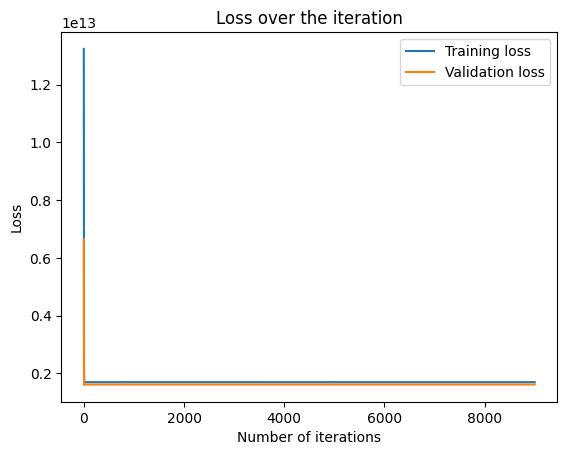

In [18]:
plt.plot([X for X in range(num_iterations1)],loss_train1a_1,label="Training loss")
plt.plot([X for X in range(num_iterations1)],loss_test1a_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [19]:
theta = np.zeros(6).reshape(6,1)
num_iterations2 = 50
learning_rate2= 0.01
theta1a_2,loss_train1a_2,loss_test1a_2 = gradient_descent(X_training1a,X_testing1a,Y_training1a,Y_testing1a, theta, learning_rate2,num_iterations2)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: RuntimeWarning: overflow encountered in cast
  return np.asarray(x, float)


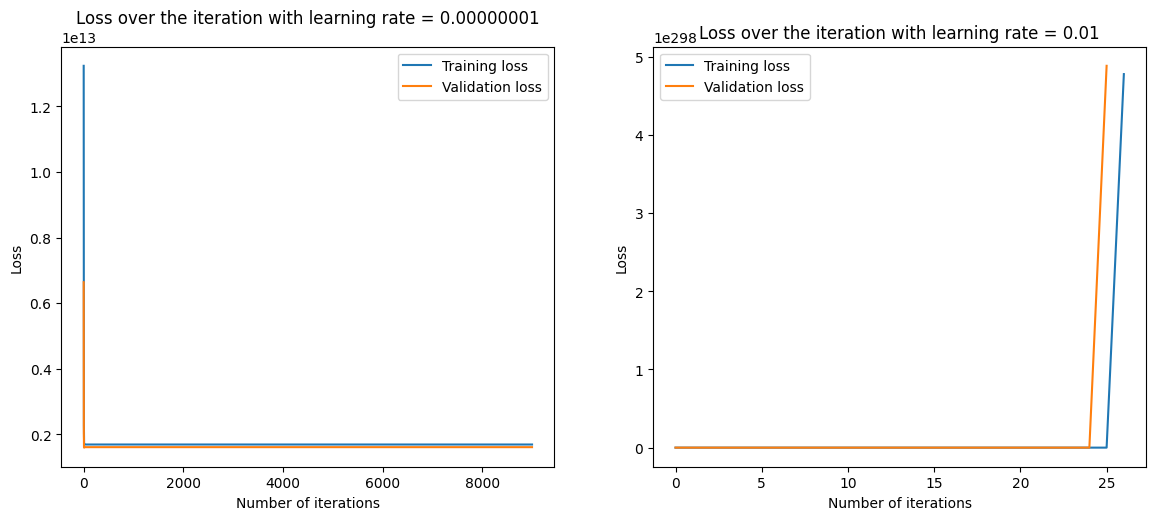

In [20]:
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([X for X in range(num_iterations1)],loss_train1a_1,label="Training loss")
plt.plot([X for X in range(num_iterations1)],loss_test1a_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.00000001')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([X for X in range(num_iterations2)],loss_train1a_2,label="Training loss")
plt.plot([X for X in range(num_iterations2)],loss_test1a_2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.01')
plt.legend()


Problem)1)b

In [21]:
variables1 = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_training1b,Y_training1b = preprocess(training,variables1)
X_testing1b,Y_testing1b = preprocess(testing,variables1)


<ipython-input-7-a53422363bdc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes':1,'no':0})
<ipython-input-7-a53422363bdc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_data_new = data[variables].replace({'yes':1,'no':0})


In [22]:
theta = np.zeros(12).reshape(12,1)
num_iterations1 = 2000
learning_rate1= 0.000000001
theta1b_1,loss_train1b_1,loss_test1b_1 = gradient_descent(X_training1b,X_testing1b,Y_training1b,Y_testing1b, theta, learning_rate1,num_iterations1)
print(theta1b_1)
print(loss_train1b_1[-1])
print(loss_test1b_1[-1])

[[8.64439100e-01]
 [8.61911599e+02]
 [3.15030689e+00]
 [1.78128967e+00]
 [2.71024995e+00]
 [7.48158659e-01]
 [3.07279812e-01]
 [4.84279948e-01]
 [1.42885944e-01]
 [6.63340924e-01]
 [6.85780548e-01]
 [3.32226531e-01]]
1690100119226.910691
1609465282548.0885601


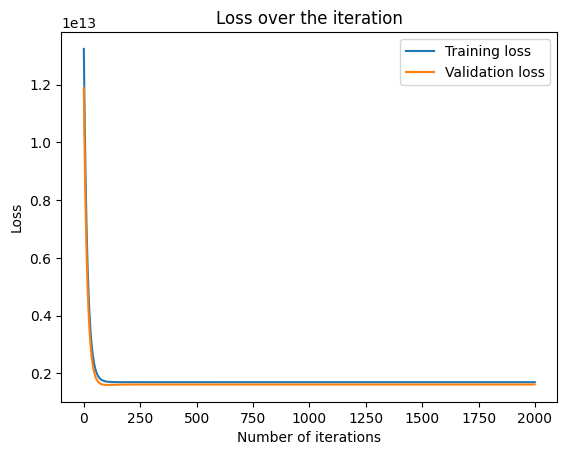

In [23]:
plt.plot([X for X in range(num_iterations1)],loss_train1b_1,label="Training loss")
plt.plot([X for X in range(num_iterations1)],loss_test1b_1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [24]:
theta = np.zeros(12).reshape(12, 1)
num_iterations2 = 50
learning_rate2 = 0.01
theta1b_2, loss_train1b_2, loss_test1b_2 = gradient_descent(X_training1b, X_testing1b, Y_training1b, Y_testing1b, theta, learning_rate2, num_iterations2)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: RuntimeWarning: overflow encountered in cast
  return np.asarray(x, float)


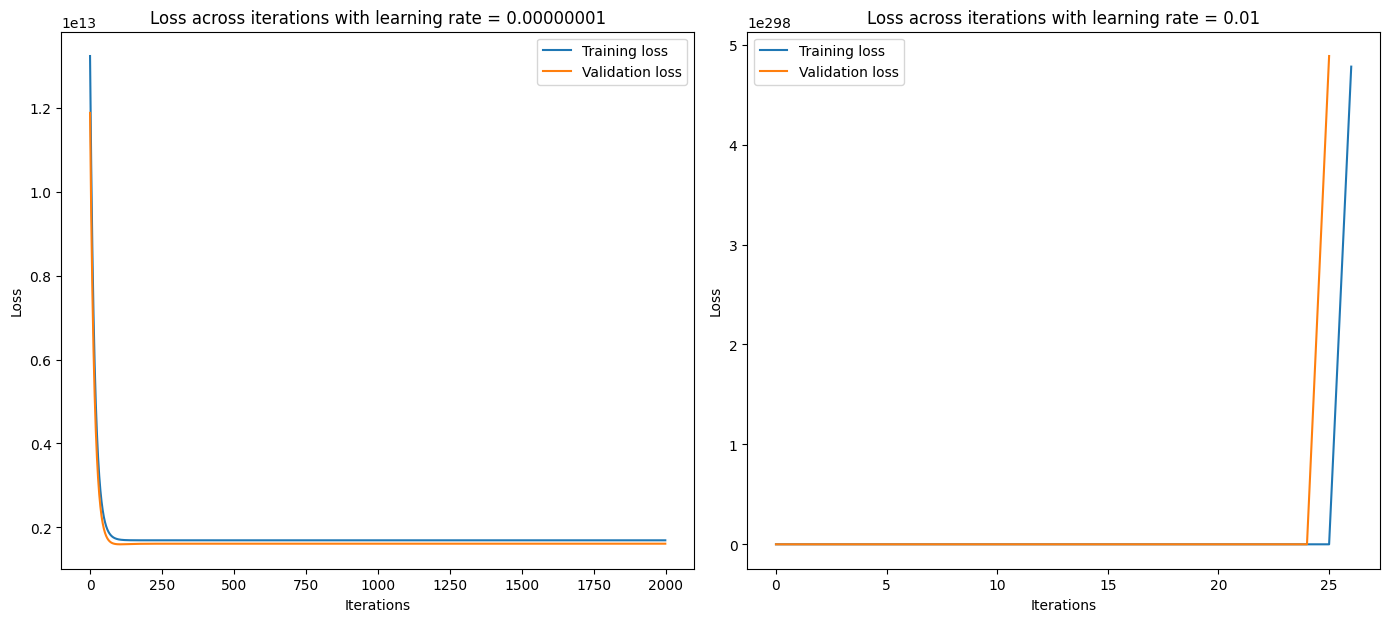

In [25]:
plt.figure(figsize=(14, 12))  # Set the figure size for the plot


plt.subplot(2, 2, 1)
plt.plot([i for i in range(num_iterations1)], loss_train1b_1, label="Training loss")
plt.plot([i for i in range(num_iterations1)], loss_test1b_1, label="Validation loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss across iterations with learning rate = 0.00000001')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([i for i in range(num_iterations2)], loss_train1b_2, label="Training loss")
plt.plot([i for i in range(num_iterations2)], loss_test1b_2, label="Validation loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss across iterations with learning rate = 0.01')
plt.legend()


# Adjust layout to prevent overlap between plots
plt.tight_layout()

# Display all the plots
plt.show()

Problem 2)a)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
standard = StandardScaler()

In [27]:
x_testing_scaler = scaler.fit_transform(X_testing1a)
x_training_scaler = scaler.fit_transform(X_training1a)
x_testing_normalised = standard.fit_transform(X_testing1a)
x_training_normalised = standard.fit_transform(X_training1a)

In [28]:
theta = np.zeros(6).reshape(6,1)
num_iterations1 = 2000
learning_rate= 0.07
theta2a,loss_train2a,loss_test2a = gradient_descent(x_training_scaler,x_testing_scaler,Y_training1a,Y_testing1a,theta,learning_rate, num_iterations1)
print(theta2a)
print(loss_train2a[-1])
print(loss_test2a[-1])

[[      0.        ]
 [6683467.98707474]
 [5290956.42821365]
 [2724092.74743948]
 [1501036.54024181]
 [1176638.20019455]]
1051780962335.1995431
1636253381070.2454454


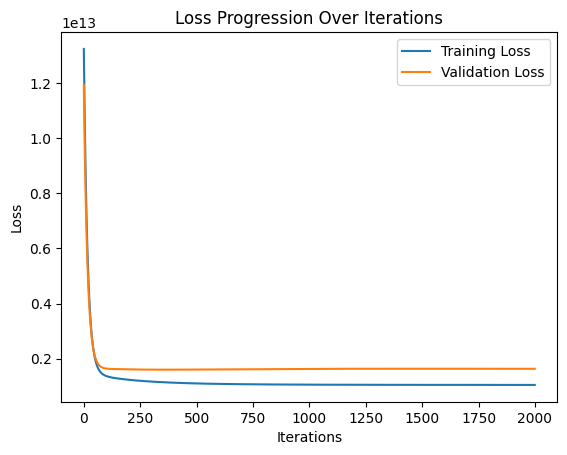

In [29]:
plt.plot(range(num_iterations1), loss_train2a, label="Training Loss")
plt.plot(range(num_iterations1), loss_test2a, label="Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Progression Over Iterations')
plt.legend()
plt.show()

In [30]:
theta = np.zeros((6, 1))
num_iterations2 = 2000
learning_rate = 0.02

theta2a1, loss_train2a1, loss_test2a1 = gradient_descent(
    x_training_normalised, x_testing_normalised,
    Y_training1a, Y_testing1a,
    theta, learning_rate, num_iterations2
)

print(theta2a1)
print(loss_train2a1[-1])
print(loss_test2a1[-1])

[[     0.        ]
 [729932.35590346]
 [ 79334.74236902]
 [641264.73849806]
 [463855.86666049]
 [287331.21111438]]
12260544218074.293435
11609071583115.9913025


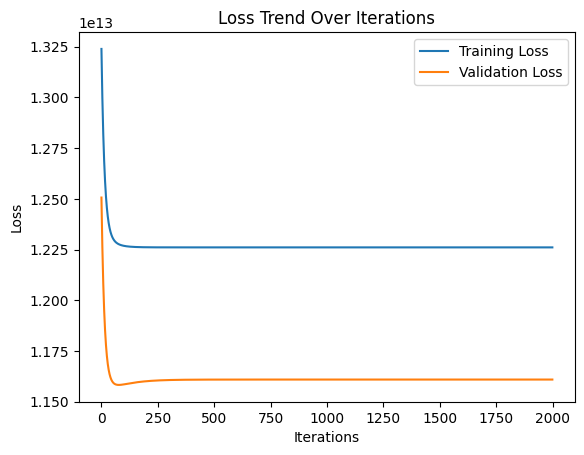

In [31]:
plt.plot(range(num_iterations1), loss_train2a1, label="Training Loss")
plt.plot(range(num_iterations1), loss_test2a1, label="Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Trend Over Iterations')
plt.legend()
plt.show()

Problem)2)b

In [32]:
x_testing_scaled2b = scaler.fit_transform(X_testing1b)
x_training_scaled2b = scaler.fit_transform(X_training1b)

x_testing_normalized2b = standard.fit_transform(X_testing1b)
x_training_normalized2b = standard.fit_transform(X_training1b)

In [33]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02

theta2b, loss_train2b, loss_test2b = gradient_descent(
    x_training_scaled2b, x_testing_scaled2b,
    Y_training1b, Y_testing1b,
    theta, learning_rate, num_iterations
)

print(theta2b)
print(loss_train2b[-1])
print(loss_test2b[-1])


[[      0.        ]
 [2535003.39025695]
 [2663355.33107928]
 [2285126.317361  ]
 [1400192.28588986]
 [1681054.97187794]
 [ 436921.39446219]
 [ 457217.18224096]
 [ 956100.8664793 ]
 [1003555.17335852]
 [1074056.00490111]
 [ 603418.13493603]]
709450137918.92833143
847456606966.107112


In [34]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02

theta2b1, loss_train2b1, loss_test2b1 = gradient_descent(
    x_training_normalized2b, x_testing_normalized2b,
    Y_training1b, Y_testing1b,
    theta, learning_rate, num_iterations
)

print(theta2b1)
print(loss_train2b1[-1])
print(loss_test2b1[-1])

[[     0.        ]
 [532835.68914464]
 [ 72722.24214025]
 [578491.77072808]
 [367612.67291123]
 [210296.49951618]
 [146049.33664   ]
 [145415.80801415]
 [204958.54141051]
 [399907.03427347]
 [222497.59251616]
 [255724.44864496]]
12073743701060.662624
11400580305190.402031


In [35]:
y_testing_scaled2b = scaler.fit_transform(Y_testing1b)
y_training_scaled2b = scaler.fit_transform(Y_training1b)

y_testing_normalized2b = standard.fit_transform(Y_testing1b)
y_training_normalized2b = standard.fit_transform(Y_training1b)


In [36]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02

theta2b_y, loss_train_2b_y, loss_test_2b_y = gradient_descent(
    x_training_scaled2b, x_testing_scaled2b,
    y_training_scaled2b, y_testing_scaled2b,
    theta, learning_rate, num_iterations
)

print(theta2b_y)
print(loss_train_2b_y[-1])
print(loss_test_2b_y[-1])

[[0.        ]
 [0.18263505]
 [0.09255043]
 [0.20411993]
 [0.11461612]
 [0.06228442]
 [0.04379567]
 [0.02550628]
 [0.07585138]
 [0.08367296]
 [0.09081683]
 [0.05765188]]
0.004568023628793929
0.005338759967196511


In [37]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02

theta2b_y2, loss_train_2b_y2, loss_test_2b_y2 = gradient_descent(
    x_training_normalized2b, x_testing_normalized2b,
    y_training_normalized2b, y_testing_normalized2b,
    theta, learning_rate, num_iterations
)

print(theta2b_y2)
print(loss_train_2b_y2[-1])
print(loss_test_2b_y2[-1])


[[0.        ]
 [0.28568816]
 [0.03899116]
 [0.31016738]
 [0.19710126]
 [0.11275375]
 [0.07830663]
 [0.07796695]
 [0.10989172]
 [0.21441639]
 [0.11929555]
 [0.13711065]]
0.16507717254940643
0.1662107441265265


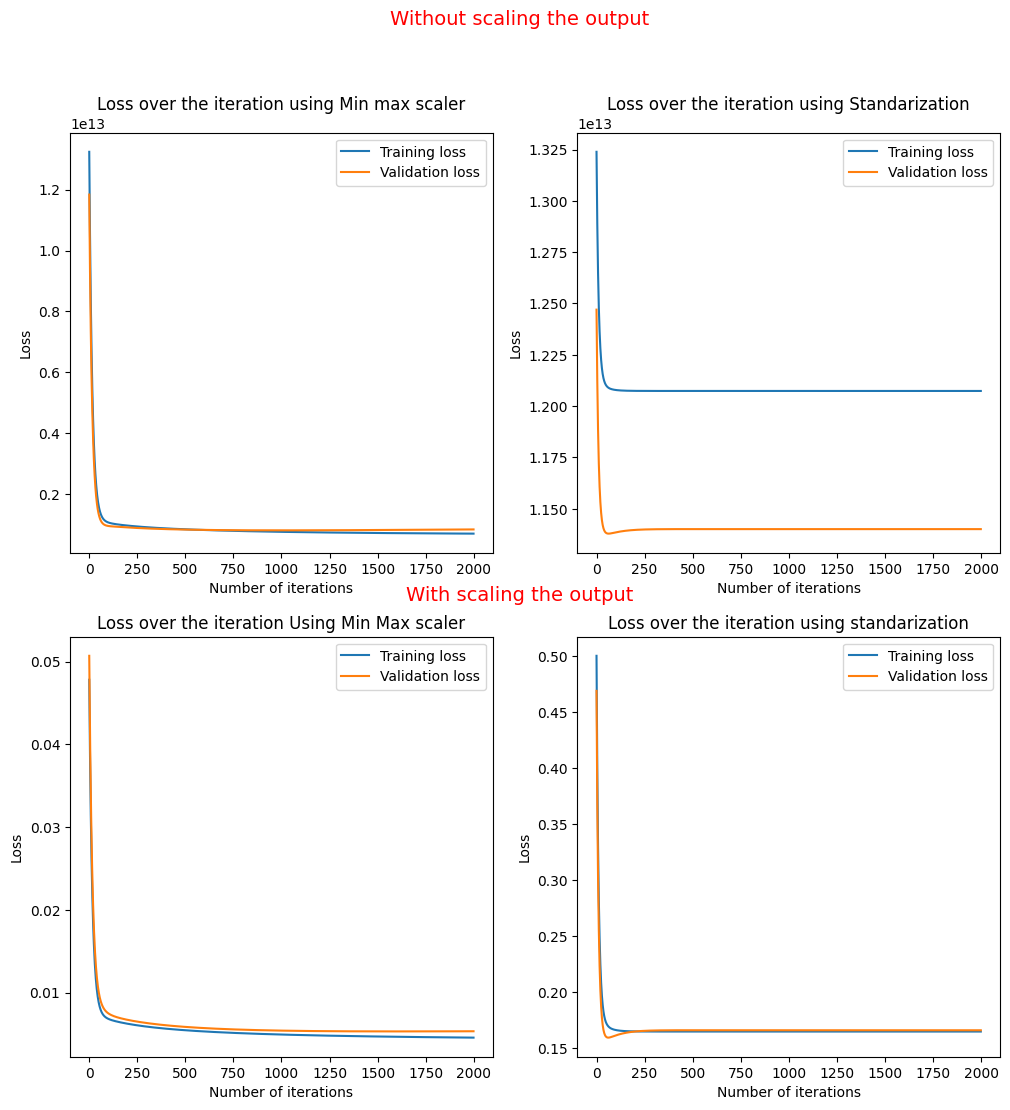

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([x for x in range(num_iterations)],loss_train2b,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test2b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min max scaler')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([x for x in range(num_iterations)],loss_train2b1,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test2b1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 0.97 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'Without scaling the output',color='red', ha='center', fontsize=14)

plt.subplot(2, 2, 3)
plt.plot([x for x in range(num_iterations)],loss_train_2b_y,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test_2b_y,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration Using Min Max scaler')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y2, 'With scaling the output',color='red', ha='center', fontsize=14)

plt.subplot(2, 2, 4)
plt.plot([x for x in range(num_iterations)],loss_train_2b_y2,label="Training loss")
plt.plot([x for x in range(num_iterations)],loss_test_2b_y2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using standarization')
plt.legend()
plt.show()
# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()

Problem 3 a

In [39]:
def gradient_descent_penalty(X_training, X_testing, Y_training, Y_testing, initial_theta,learning_rate, num_iterations, alpha):
    m_training = len(Y_training)
    m_testing = len(Y_testing)
    theta = initial_theta
    training_losses = []
    testing_losses = []

    for i in range(num_iterations):
        predictions_training = X_training.dot(theta)
        error_training = predictions_training - Y_training
        gradient = ((X_training.T.dot(error_training) +alpha*theta)/ m_training)
        theta -= learning_rate * gradient
        training_loss = (np.sum(error_training**2)+alpha * np.sum(np.square(theta))) / (2 * m_training)
        training_losses.append(training_loss)
        predictions_testing = X_testing.dot(theta)
        error_testing = predictions_testing - Y_testing
        testing_loss = (np.sum(error_testing**2))/ (2 * m_testing)
        testing_losses.append(testing_loss)

    return theta, training_losses[:i+1], testing_losses[:i+1]

In [40]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.03
alpha = 1
theta3ap,loss_train3a,loss_test3a = gradient_descent_penalty(x_training_scaler, x_testing_scaler,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3ap)
print(loss_train3a[-1])
print(loss_test3a[-1])

[[      0.        ]
 [5672419.81546032]
 [5467799.43747955]
 [2372721.53948183]
 [1728327.85088055]
 [1552669.47856331]]
1157183201148.8669763
1610897147255.8445688


In [41]:
theta = np.zeros(6).reshape(6,1)
num_iterations = 2000
learning_rate= 0.08
alpha = 8
theta3a1,loss_train3a1,loss_test3a1 = gradient_descent_penalty(x_training_normalised, x_testing_normalised,Y_training1a,Y_testing1a,theta,learning_rate,num_iterations,alpha)
print(theta3a1)
print(loss_train3a1[-1])
print(loss_test3a1[-1])

[[     0.        ]
 [718378.00382349]
 [ 85983.83124   ]
 [631785.40905037]
 [456620.0361862 ]
 [286634.24874638]]
12271833166766.531119
11606089587275.128758


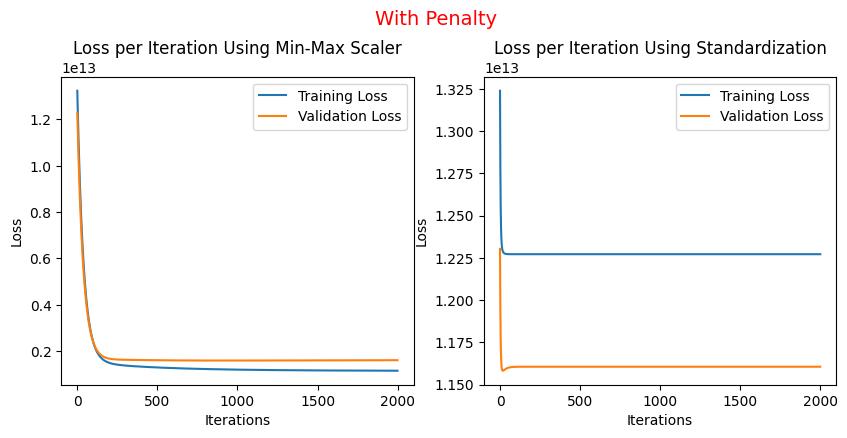

In [42]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), loss_train3a, label="Training Loss")
plt.plot(range(num_iterations), loss_test3a, label="Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration Using Min-Max Scaler')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle title
middle_y1 = 1.01  # Y-coordinate for the title position
plt.figtext(middle_x, middle_y1, 'With Penalty', color='red', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), loss_train3a1, label="Training Loss")
plt.plot(range(num_iterations), loss_test3a1, label="Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration Using Standardization')
plt.legend()

plt.show()


problem 3)b

In [48]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02
alpha = 3

# Changing 'gradient_descent_with_penalty' to 'gradient_descent_penalty'
theta3b, loss_train3b, loss_test3b = gradient_descent_penalty(
    x_training_scaled2b, x_testing_scaled2b,
    Y_training1b, Y_testing1b,
    theta, learning_rate, num_iterations, alpha
)

print(theta3b)
print(loss_train3b[-1])
print(loss_test3b[-1])

[[      0.        ]
 [2340788.63512488]
 [2531230.55576424]
 [2099851.07935409]
 [1402640.517865  ]
 [1764895.51895518]
 [ 447319.47516642]
 [ 484484.72369442]
 [ 897666.43745278]
 [1023786.42176466]
 [1076878.30623036]
 [ 607341.74403429]]
810207413014.0871839
826079029219.8341993


In [50]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02
alpha = 3

theta3b1, loss_train3b1, loss_test3b1 = gradient_descent_penalty(
    x_training_normalized2b, x_testing_normalized2b,
    Y_training1b, Y_testing1b,
    theta, learning_rate, num_iterations, alpha
)

print(theta3b1)
print(loss_train3b1[-1])
print(loss_test3b1[-1])

[[     0.        ]
 [530128.20900106]
 [ 74954.20959239]
 [575265.85403998]
 [365701.43499743]
 [210205.70887647]
 [146475.71493158]
 [144474.56277969]
 [203515.28115373]
 [398491.22039207]
 [222526.46513951]
 [254919.9942381 ]]
12077726010883.76202
11399787893278.968877


In [51]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02
alpha = 1

theta3by, loss_train3by, loss_test3by = gradient_descent_penalty(
    x_training_scaled2b, x_testing_scaled2b,
    y_training_scaled2b, y_testing_scaled2b,
    theta, learning_rate, num_iterations, alpha
)

print(theta3by)
print(loss_train3by[-1])
print(loss_test3by[-1])


[[0.        ]
 [0.17726611]
 [0.09228564]
 [0.19779785]
 [0.1137809 ]
 [0.06441405]
 [0.04380984]
 [0.02597782]
 [0.07401899]
 [0.0840133 ]
 [0.09018091]
 [0.05743201]]
0.004737400472239123
0.005337225354449175


In [53]:
theta = np.zeros((12, 1))
num_iterations = 2000
learning_rate = 0.02
alpha = 1

theta3by1, loss_train3by1, loss_test3by1 = gradient_descent_penalty(
    x_training_normalized2b, x_testing_normalized2b,
    y_training_normalized2b, y_testing_normalized2b,
    theta, learning_rate, num_iterations, alpha
)

print(theta3by1)
print(loss_train3by1[-1])
print(loss_test3by1[-1])


[[0.        ]
 [0.28520166]
 [0.03939453]
 [0.30958781]
 [0.19675705]
 [0.11273844]
 [0.07838442]
 [0.07779693]
 [0.10963256]
 [0.21416302]
 [0.11930152]
 [0.13696677]]
0.16545987287572603
0.1661282439591852


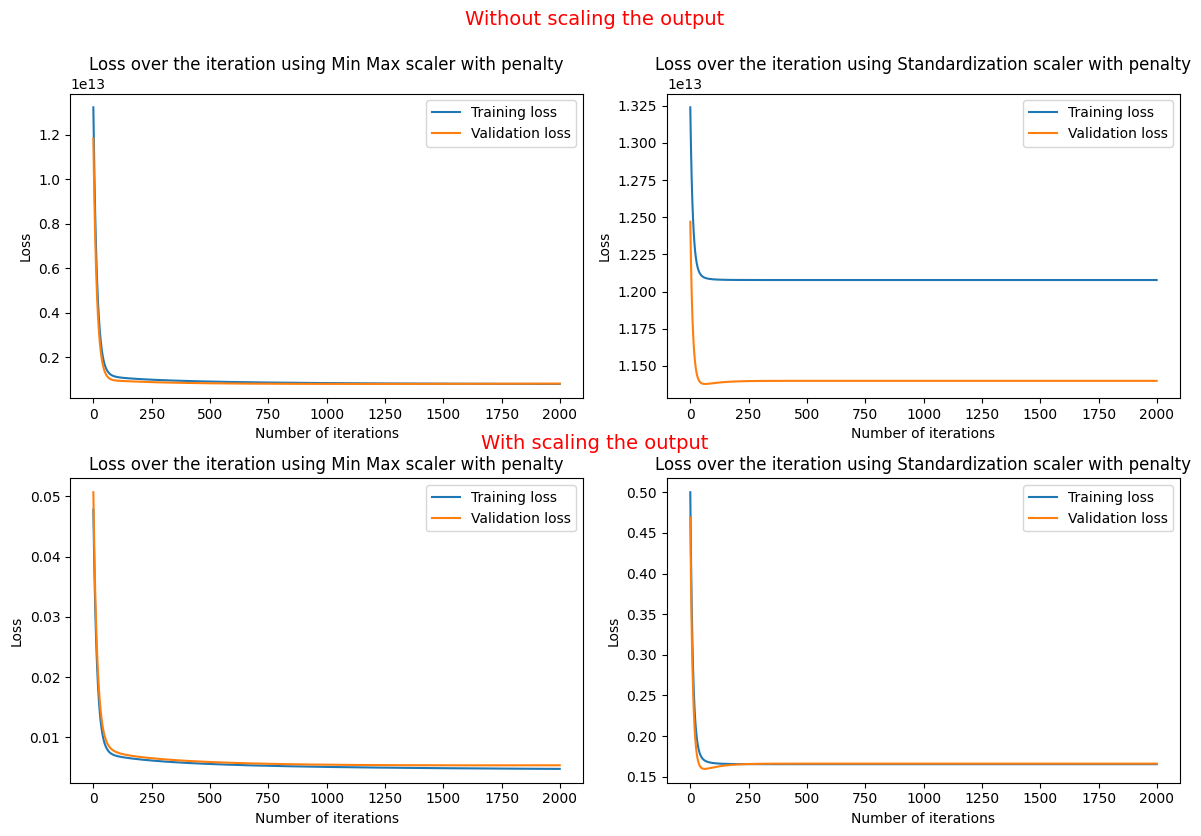

In [54]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Subplot 1: Min Max scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 1)
plt.plot([x for x in range(num_iterations)], loss_train3b, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3b, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 1.02  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'Without scaling the output',color='red', ha='center', fontsize=14)

# Subplot 2: Standardization scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 2)
plt.plot([x for x in range(num_iterations)], loss_train3b1, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3b1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Subplot 3: Min Max scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 3)
plt.plot([x for x in range(num_iterations)], loss_train3by, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3by, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y2, 'With scaling the output',color='red', ha='center', fontsize=14)

# Subplot 4: Standardization scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 4)
plt.plot([x for x in range(num_iterations)], loss_train3by1, label="Training loss")
plt.plot([x for x in range(num_iterations)], loss_test3by1, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()